# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
# Send the browser to the URL
browser.visit(url)

#Save the html from the browser
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
#First get the table(s)
table = soup.find('table', class_='table')
#Extract the rows within the <tr></tr> tags
rows = table.find_all('tr')
#Create an empty list
table_data = []
#Loop through the rows to extract data
for row in rows:
    cols = row.find_all('th')
    table_data.append([row for row in table_data if row])
    mars_news_df= pd.DataFrame([row for row in table_data if row])
    mars_news_df.head()
# Extract all rows
#locate the table to extract rows from
table = soup.find('table', class_="table")
rows = table.find_all("tr")
print(rows)

[<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>, <tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
row_list = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr'):
    #Empty list to store cells
    cells_data = []  
    # Loop through each cell in the row (td or th)
    for cell in row.find_all(['td','th']):
        #Iterate through the cells in each row in the table
        cells = cell.text.strip()
        cells_data.append(cells)
    row_list.append(cells_data)

print("Scraped data rows:")
for row in row_list:
    print(row)


Scraped data rows:
['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0'

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]
mars_news_df = pd.DataFrame(row_list, columns=columns)
mars_news_df.columns = mars_news_df.columns.str.strip()

In [9]:
# Confirm DataFrame was created successfully
mars_news_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1868 non-null   object
 1   terrestrial_date  1868 non-null   object
 2   sol               1868 non-null   object
 3   ls                1868 non-null   object
 4   month             1868 non-null   object
 5   min_temp          1868 non-null   object
 6   pressure          1868 non-null   object
dtypes: object(7)
memory usage: 102.3+ KB


In [12]:
print(mars_news_df['terrestrial_date'].head())

0    terrestrial_date
1          2012-08-16
2          2012-08-17
3          2012-08-18
4          2012-08-19
Name: terrestrial_date, dtype: object


In [23]:
# Change data types for data analysis
# Converting the 'terrestrial_date' column to datetime format
mars_news_df.loc[1:, 'terrestrial_date'] = pd.to_datetime(mars_news_df['terrestrial_date'][1:], format='%Y-%m-%d')
#Remove rows with NaN values in sol column
mars_news_df = mars_news_df.dropna(subset=['sol'])
# Convert other columns to specified data types
mars_news_df['sol'] = pd.to_numeric(mars_news_df['sol'], errors='coerce')
mars_news_df['ls'] = pd.to_numeric(mars_news_df['ls'], errors='coerce')
mars_news_df['month'] = pd.to_numeric(mars_news_df['month'], errors='coerce')
mars_news_df['min_temp'] = pd.to_numeric(mars_news_df['min_temp'], errors='coerce')
mars_news_df['pressure'] = pd.to_numeric(mars_news_df['pressure'], errors='coerce')

In [25]:
# Confirm type changes were successful by examining data types again
mars_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1868 non-null   object 
 1   terrestrial_date  1868 non-null   object 
 2   sol               1867 non-null   float64
 3   ls                1867 non-null   float64
 4   month             1867 non-null   float64
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(5), object(2)
memory usage: 102.3+ KB


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [26]:
# 1. How many months are there on Mars?
monthly_counts = mars_news_df['month'].value_counts().sort_index().reset_index(drop=True)
monthly_counts.index += 1
print(monthly_counts)

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [28]:
# 2. How many Martian days' worth of data are there?
martian_days = mars_news_df['sol'].nunique()
print(martian_days)

1867


In [29]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = mars_news_df.groupby('month')['min_temp'].mean()
print(average_low_temp_by_month)

month
1.0     -77.16092
2.0    -79.932584
3.0    -83.307292
4.0    -82.747423
5.0    -79.308725
6.0     -75.29932
7.0     -72.28169
8.0    -68.382979
9.0    -69.171642
10.0   -71.982143
11.0   -71.985507
12.0   -74.451807
Name: min_temp, dtype: object


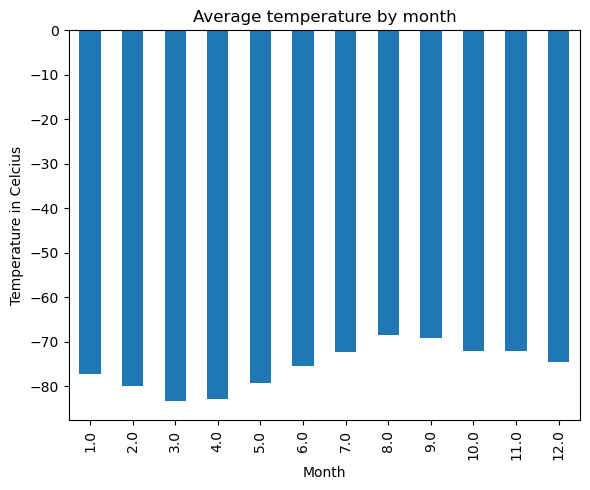

In [27]:
# Plot the average temperature by month
import matplotlib.pyplot as plt

# The average low temperature by month
average_low_temp_by_month = mars_news_df.groupby('month')['min_temp'].mean()

plt.figure(figsize=(6, 5))
average_low_temp_by_month.plot(kind='bar')
plt.title('Average temperature by month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

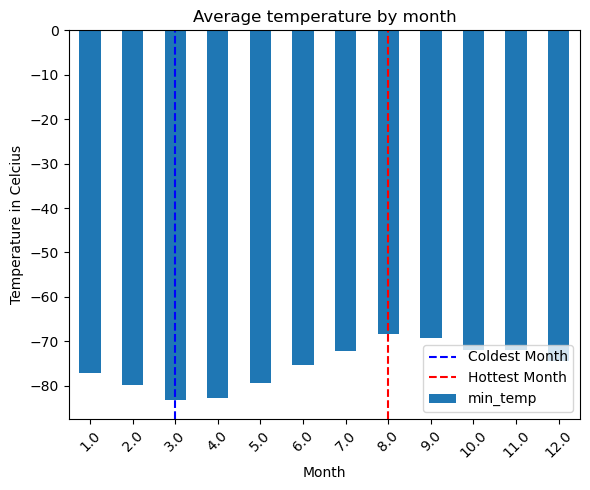

In [28]:
# Identify the coldest and hottest months in Curiosity's location
average_min_temp_by_month = mars_news_df.groupby('month')['min_temp'].mean()

# Find the coldest and hottest months
coldest_month = average_min_temp_by_month.idxmin()
hottest_month = average_min_temp_by_month.idxmax()

#Average minimum daily temperature by month
plt.figure(figsize=(6, 5))
average_min_temp_by_month.plot(kind='bar')
plt.title("Average temperature by month")
plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')
plt.xticks(rotation=45)

# Highlight the coldest and hottest months
plt.axvline(x=coldest_month - 1, color='blue', linestyle='--', label='Coldest Month')
plt.axvline(x=hottest_month - 1, color='red', linestyle='--', label='Hottest Month')

plt.legend()
plt.tight_layout()
plt.show()

In [29]:
# 4. Average pressure by Martian month
average_pressure_by_month = mars_news_df.groupby('month')['pressure'].mean()
# Print the result
print(average_pressure_by_month)

month
1.0     862.488506
2.0     889.455056
3.0     877.322917
4.0     806.329897
5.0     748.557047
6.0     745.054422
7.0     795.105634
8.0     873.829787
9.0     913.305970
10.0    887.312500
11.0    857.014493
12.0    842.156627
Name: pressure, dtype: float64


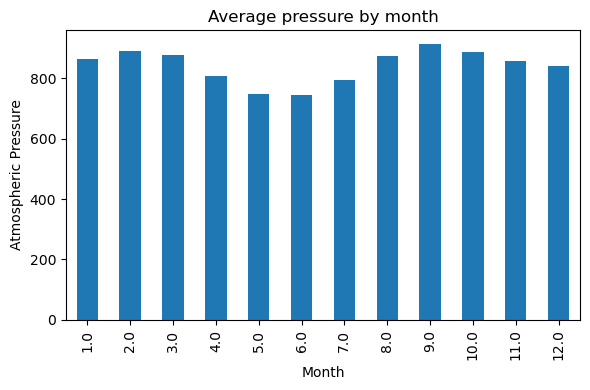

In [30]:
# Plot the average pressure by month
average_pressure_by_month = mars_news_df.groupby('month')['pressure'].mean()
plt.figure(figsize=(6, 4))
average_pressure_by_month.plot(kind='bar')
plt.title('Average pressure by month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


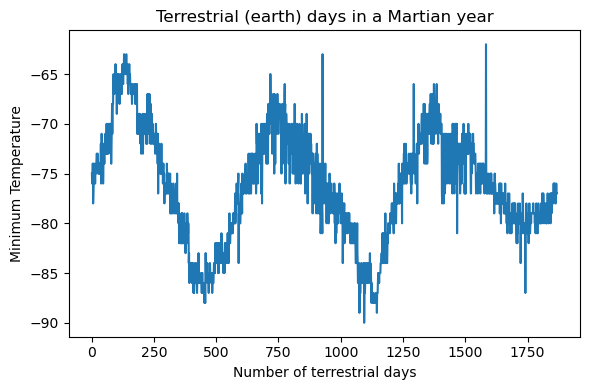

In [31]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.figure(figsize=(6, 4))
plt.plot(mars_news_df.index, mars_news_df['min_temp'])
plt.title('Terrestrial (earth) days in a Martian year')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')
plt.tight_layout()
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [32]:
# Write the data to a CSV
csv_file_path = "mars_data.csv"

# Exporting data to a CSV file
mars_news_df.to_csv(csv_file_path, index=False)

print("Data has been exported to csv", csv_file_path)

Data has been exported to csv mars_data.csv


In [33]:
browser.quit()